# Seaborn

In [33]:
! pip install seaborn

In [1]:
## This code allows the scroll in presentation mode. Hidden content in slides view
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'scroll': True,
})

{'scroll': True, 'width': 1024, 'height': 768}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### Scatter plots

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Vamos a mostrar la relación entre la cuenta total y la propina

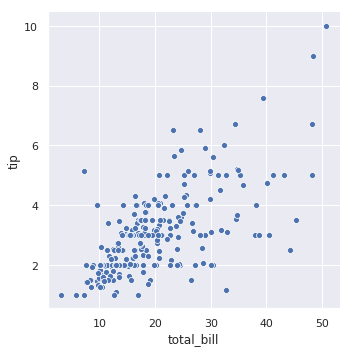

In [4]:
sns.relplot(x="total_bill", y="tip", data=tips);

Añadimos una tercera variable al análisis: si es fumador o no

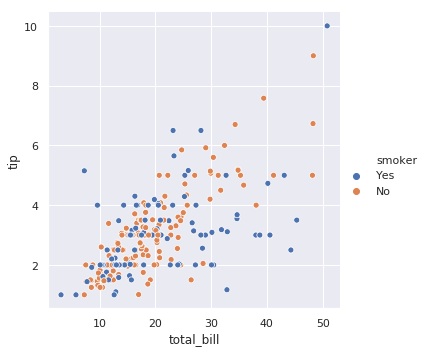

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

Añadimos simbología a la variable de colores para diferenciarla mejor

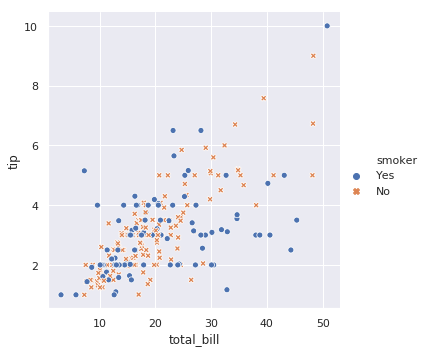

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            style="smoker", data=tips);

Es posible representar 4 variables combinando el color en una variable y la simbología en otra

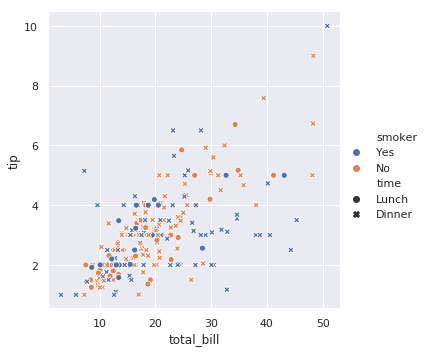

In [7]:
sns.relplot(x="total_bill", y="tip", 
            hue="smoker", style="time", data=tips);

Como la variable es categórica, automáticamente aplica una paleta de colores para diferenciar cada valor. Si usamos una variable numérica, la paleta de colores será un degradado automáticamente

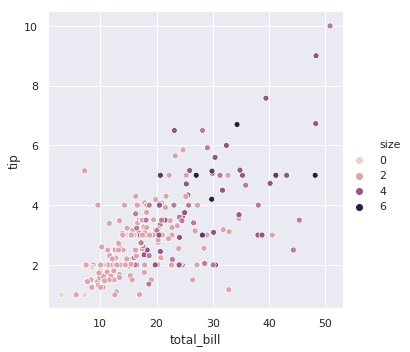

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

También podemos jugar con el tamaño del punto

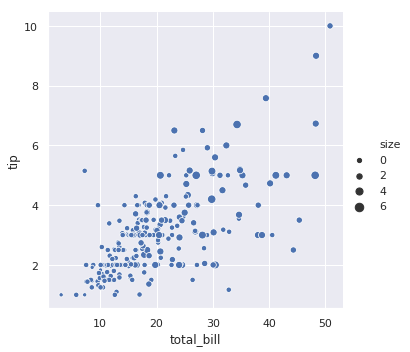

In [9]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

Y esta relación de tamaño se puede ajustar

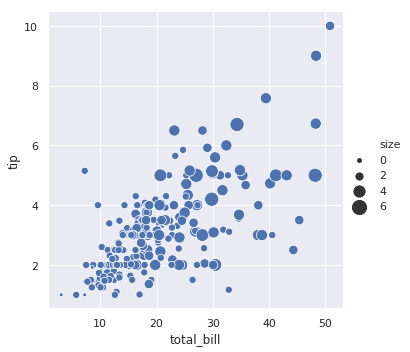

In [10]:
sns.relplot(x="total_bill", y="tip", 
            size="size", sizes=(15, 200), data=tips);

### Relaciones múltiples con facetas

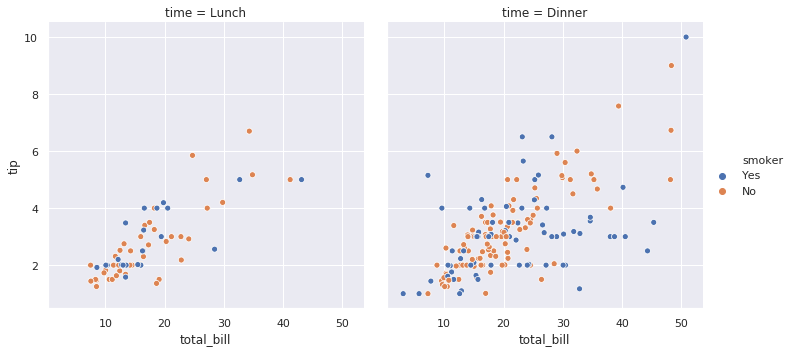

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

## Datos categóricos

Catplot se comporta como scatter pero con valores categóricos

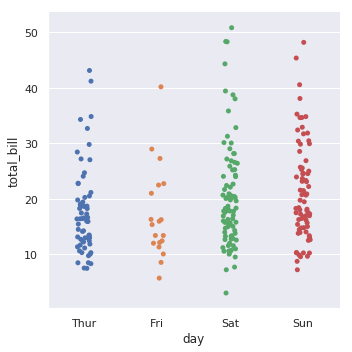

In [12]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

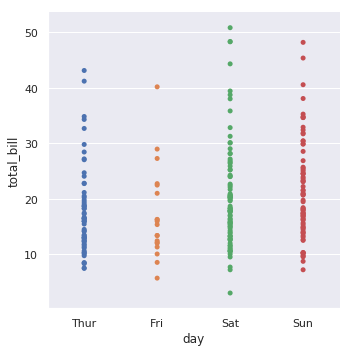

In [13]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

También se puede ajustar los puntos a lo largo del eje categórico utilizando un algoritmo que evita que se superpongan. 
Puede dar una mejor representación de la distribución de las observaciones, aunque solo funciona bien para conjuntos de datos relativamente pequeños.

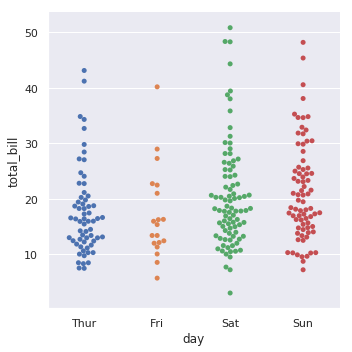

In [14]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

También se puede usar una tercera variable

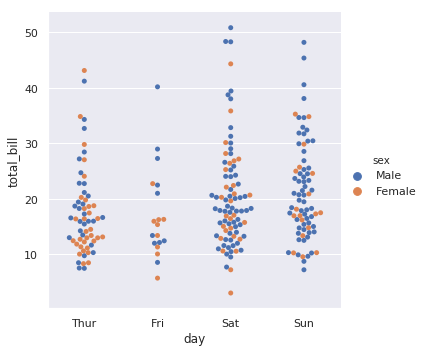

In [15]:
sns.catplot(x="day", y="total_bill", 
            hue="sex", kind="swarm", data=tips);

También funciona con variables no categóricas

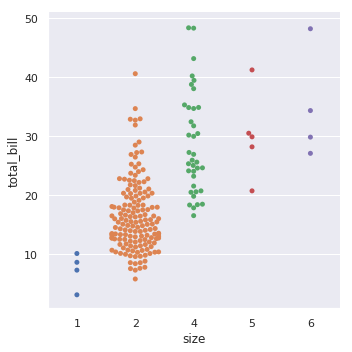

In [16]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

Se puede elegir el orden de las variables

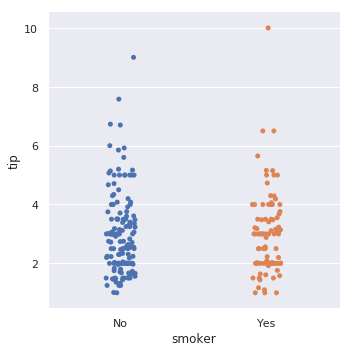

In [17]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

Si quiero rotar el gráfico, solo tengo que invertir las variables

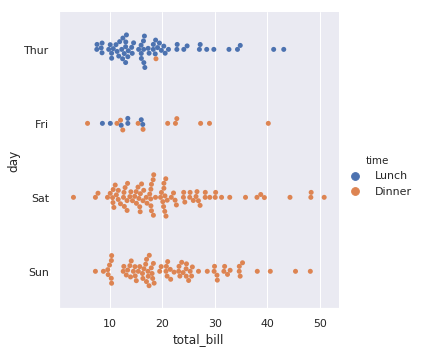

In [18]:
sns.catplot(x="total_bill", y="day", 
            hue="time", kind="swarm", data=tips);

### Distribución de observaciones por categoría

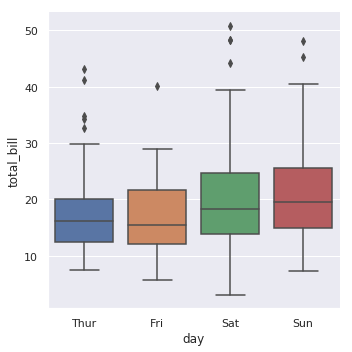

In [19]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Con una tercera variable

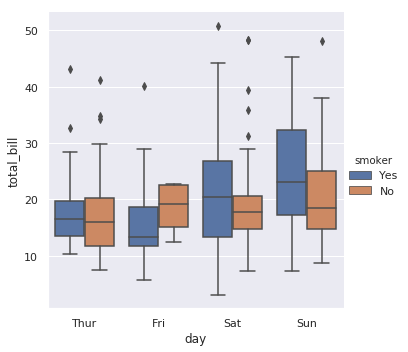

In [20]:
sns.catplot(x="day", y="total_bill", 
            hue="smoker", kind="box", data=tips);

Los violines combinan los boxplot con una estimación de densidad

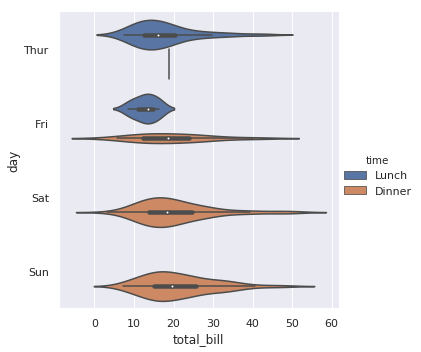

In [21]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

También es posible dividir los violines por variable

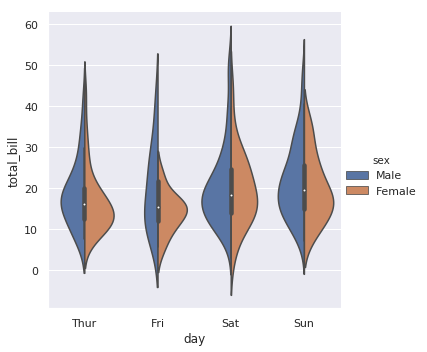

In [22]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

### Multiples relaciones con facetas

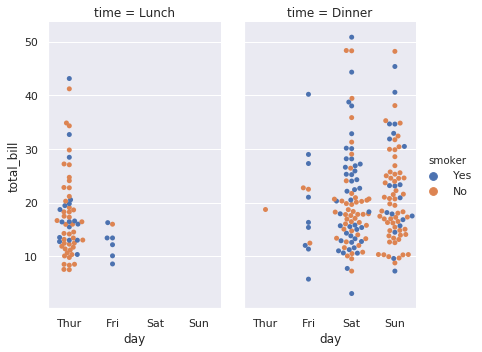

In [23]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

## Distribuciones de datos

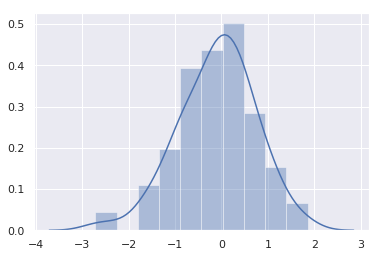

In [24]:
x = np.random.normal(size=100)
sns.distplot(x);

Con el parámetro `rug` o el gráfico `rugplot` mostrará una línea por cada observación

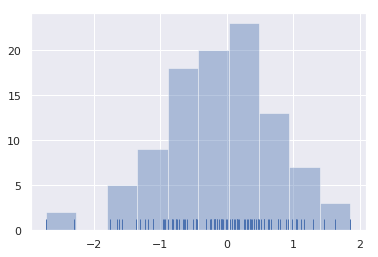

In [25]:
sns.distplot(x, kde=False, rug=True);

Podemos ajustar los bins del histograma

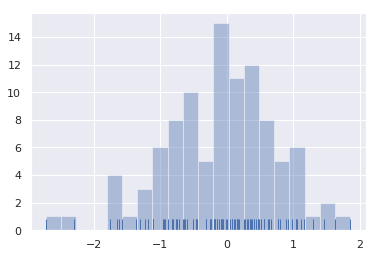

In [26]:
sns.distplot(x, bins=20, kde=False, rug=True);

También podemos mostrar solo la Kernel density estimation

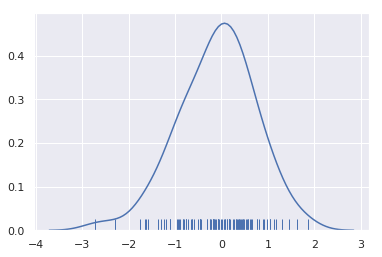

In [27]:
sns.distplot(x, hist=False, rug=True);

### Distribuciones con 2 variables

In [28]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-0.298206,0.624754
1,0.713194,1.670885
2,-0.509031,0.437843
3,0.789010,1.628481
4,-0.893024,1.175818


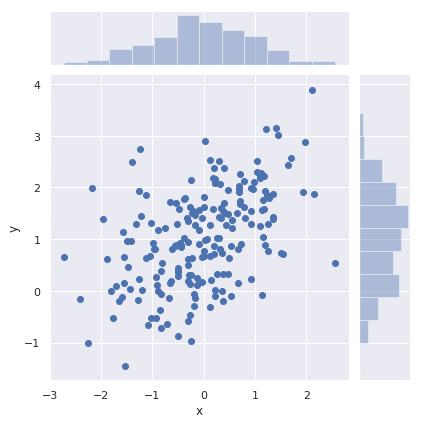

In [29]:
sns.jointplot(x="x", y="y", data=df);

Gráficos hexbin

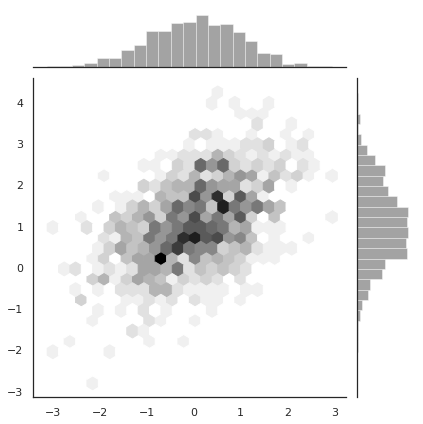

In [30]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

Kernel density

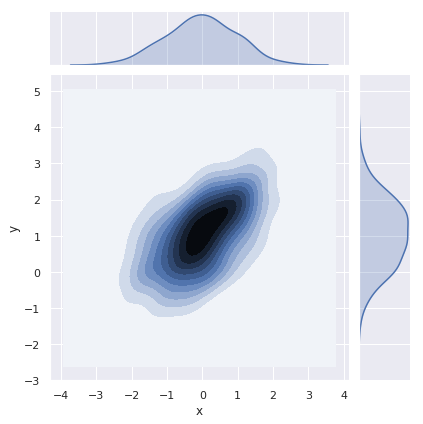

In [31]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

### Visualizando múltiples variables y sus relaciones

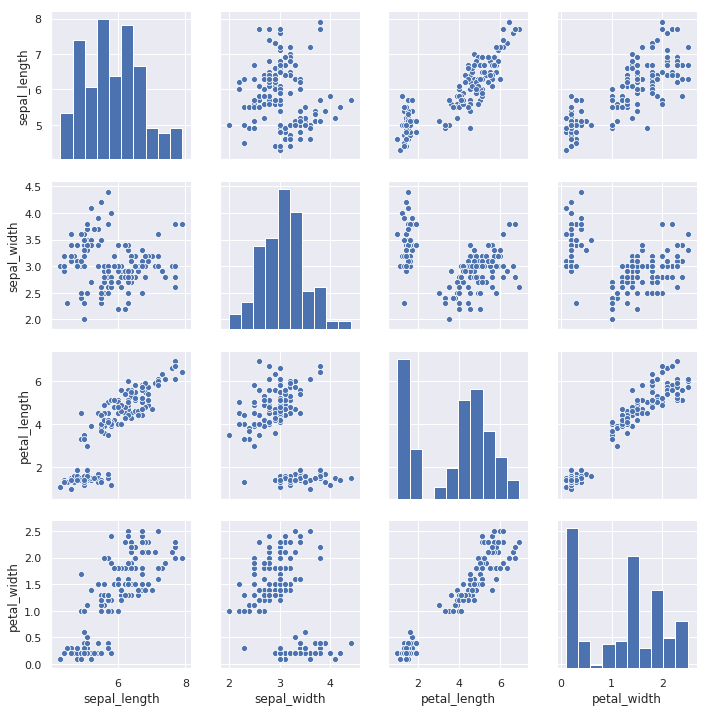

In [32]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);